<a href="https://colab.research.google.com/github/JMartinRutgers/financial-/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [136]:
#import data set from coronavirus 
import requests
from pandas import DataFrame as df
import plotly.graph_objects as go 

r = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456&file_type=json')

#change to json
r

#change to json


<Response [400]>

In [137]:
# class that will interact with the FRED API

class FredPy:

    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
                    "?series_id={seriesID}&api_key={key}&file_type=json" + \
                    "&observation_start={start}&observation_end={end}&units={units}"

    def set_token(self, token):
        self.token = token


    def get_series(self, seriesID, start, end, units):

        # The URL string with the values inserted into it
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )

        response = requests.get(url_formatted)

        if(self.token):
            # If the response was successful, extract the data from it
            if(response.status_code == 200):
                data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                        .assign(value = lambda cols: cols['value'].astype(float))\
                        .rename(columns = {'value': seriesID})

                return data

            else:
                raise Exception("Bad response from API, status code = {}".format(response.status_code))
        else:
            raise Exception("You did not specify an API key.")


In [138]:
# Instantiate fredpy object
fredpy = FredPy()

# Set the API key
fredpy.set_token(api_key)

# Test getting the GDP series
data = fredpy.get_series(
    seriesID = 'GDP', 
    start = '2005-01-01',
    end = '2023-12-03', 
    units = 'pc1'
)

In [139]:
data.head()


,date,GDP
0,2005-01-01,7.07714
1,2005-04-01,6.68582
2,2005-07-01,6.80467
3,2005-10-01,6.36207
4,2006-01-01,6.51567


In [140]:
# Let's get the unemployment rate data
unemployment_data = fredpy.get_series(
    seriesID="UNRATE", 
    start = '2005-01-01',
    end = '2023-12-03', 
    units = 'lin'
)

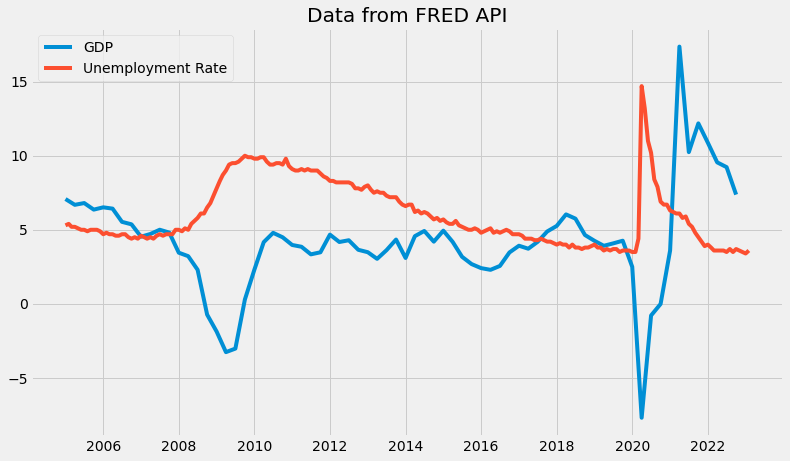

In [141]:
# visualize the series
plt.figure(figsize = (12, 7))
plt.plot(data['date'], data['GDP'], label="GDP")
plt.plot(unemployment_data['date'], unemployment_data['UNRATE'], label="Unemployment Rate")
plt.legend()
plt.title("Data from FRED API")
plt.show()